In [4]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from pprint import pprint
from datetime import datetime, timedelta

# Extract Data from CSV Files and Merge them

In [5]:
crashes_data = pd.read_csv('Crashes_in_DC.csv', low_memory=False, parse_dates=True)
crashes_data.head()

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCATIONERROR,LASTUPDATEDATE,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY
0,-77.031956,38.899902,85021026,27674721,18076444,2018-05-13T21:15:36.000Z,11001402,55.638,31.327459,8680.0,...,11042442,H ST NW,20.687175,South,NaN,2018-05-25T17:40:55.000Z,38.900026,-77.031965,397259.53,136894.08
1,-76.937721,38.889783,85021027,27112008,16182556,2016-11-01T02:26:03.000Z,15031912,5711.647,0.000000,4701.0,...,12015342,BENNING RD NE,15.492998,West,NaN,NaN,38.889795,-76.937719,405426.80,135840.07
2,-76.995093,38.905551,85021028,24490573,13034481,2013-03-17T05:00:00.000Z,12055522A,122.834,0.000000,13683.0,...,12084792,TAPSCOTT ST NE,67.748277,East,NaN,NaN,38.905776,-76.994930,NaN,NaN
3,-77.036518,38.940813,85021029,27112014,16185922,2016-11-01T02:31:25.000Z,11084892,1783.690,0.000000,11073.0,...,11001602,16TH ST NW,8.776265,West,NaN,NaN,38.940765,-77.036516,396810.02,141417.08
4,-76.913418,38.896023,85021030,24490575,13034206,2013-03-19T05:00:00.000Z,12031982,0.000,0.000013,3927.0,...,12006102,61ST ST NE,0.850636,North,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
crash_details = pd.read_csv('Crash_Details_Table.csv', low_memory=False, parse_dates=True)
crash_details.head()


,OBJECTID,CRIMEID,CCN,PERSONID,PERSONTYPE,AGE,FATAL,MAJORINJURY,MINORINJURY,VEHICLEID,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,175822354,27823785,18171025,87612070,Driver,0,N,N,N,4181220,Large/heavy Truck,N,VA,N,N
1,175822355,27823705,18170923,87612100,Driver,28,N,N,Y,4181265,Passenger Car/automobile,Y,DC,N,N
2,175822356,27824068,18171174,87612105,Driver,23,N,N,N,4181389,Passenger Car/automobile,Y,VA,N,N
3,175822357,27823832,18171027,87612134,Driver,54,N,N,N,4181292,Passenger Car/automobile,Y,Di,N,N
4,175822358,27823756,18171002,87612139,Driver,60,N,N,N,4181237,Passenger Car/automobile,N,DC,N,N


In [31]:
merged_data = crashes_data.merge(crash_details, on='CRIMEID', how='left')
merged_data.head()


,X,Y,OBJECTID_x,CRIMEID,CCN_x,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,AGE,FATAL,MAJORINJURY,MINORINJURY,VEHICLEID,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,-77.031956,38.899902,85021026,27674721,18076444,2018-05-13T21:15:36.000Z,11001402,55.638,31.327459,8680.0,...,0.0,N,N,N,3884008,Passenger Car/automobile,N,VA,N,N
1,-76.937721,38.889783,85021027,27112008,16182556,2016-11-01T02:26:03.000Z,15031912,5711.647,0.000000,4701.0,...,48.0,N,N,N,2757090,Passenger Car/automobile,N,DC,N,N
2,-76.937721,38.889783,85021027,27112008,16182556,2016-11-01T02:26:03.000Z,15031912,5711.647,0.000000,4701.0,...,49.0,N,N,N,2757091,Large/heavy Truck,N,IL,N,N
3,-76.995093,38.905551,85021028,24490573,13034481,2013-03-17T05:00:00.000Z,12055522A,122.834,0.000000,13683.0,...,0.0,N,N,N,927946,Passenger Car/automobile,N,Un,N,N
4,-77.036518,38.940813,85021029,27112014,16185922,2016-11-01T02:31:25.000Z,11084892,1783.690,0.000000,11073.0,...,39.0,N,N,N,2753149,Passenger Car/automobile,Y,MD,N,N


In [8]:
df = merged_data

# Convert REPORTDATE 
*REPORTDATE :  "2018-05-13T21:15:36.000Z" 
*datetime   :  "2018-05-13 21:15:36.000" 


In [9]:
df['datetime'] = pd.to_datetime(df['REPORTDATE'])
df.set_index('datetime',inplace=True)

#I don't see any bad reportdate -- 
test = pd.DataFrame()
test = pd.to_datetime(df['REPORTDATE'])
print(test.count())
test.dropna()
print(test.count())

447577
447577


# Number of Accidents per Months (2014-2018)

In [10]:
yearlyCount = pd.DataFrame()
s2014 = df['2014']
s2015 = df['2015']
s2016 = df['2016']
s2017 = df['2017']
s2018 = df['2018']

numAccidentMonthly = s2014.groupby([s2014.index.month,s2014['CRIMEID']]).agg({'count'})
monthYearly = (numAccidentMonthly.iloc[:,0].groupby('datetime').count())
yearlyCount['2014'] = monthYearly

numAccidentMonthly = s2015.groupby([s2015.index.month,s2015['CRIMEID']]).agg({'count'})
monthYearly = (numAccidentMonthly.iloc[:,0].groupby('datetime').count())
yearlyCount['2015'] = monthYearly


numAccidentMonthly = s2016.groupby([s2016.index.month,s2016['CRIMEID']]).agg({'count'})
monthYearly = (numAccidentMonthly.iloc[:,0].groupby('datetime').count())
yearlyCount['2016'] = monthYearly


numAccidentMonthly = s2017.groupby([s2017.index.month,s2017['CRIMEID']]).agg({'count'})
monthYearly = (numAccidentMonthly.iloc[:,0].groupby('datetime').count())
yearlyCount['2017'] = monthYearly


numAccidentMonthly = s2018.groupby([s2018.index.month,s2018['CRIMEID']]).agg({'count'})
monthYearly = (numAccidentMonthly.iloc[:,0].groupby('datetime').count())
yearlyCount['2018'] = monthYearly
monthYearly
yearlyCount


,2014,2015,2016,2017,2018
datetime,,,,,
1,1378,1538,1889,2113,2024
2,1305,1458,1806,1836,1866
3,1548,1723,2266,2355,2193
4,1649,1865,2289,2341,2232
5,1788,1832,2383,2463,2402
6,1712,1647,2433,2295,2378
7,1660,1876,2287,2248,2278
8,1641,1787,2184,2097,2218
9,1753,2089,2342,2269,2278


In [11]:
yearlyCount

,2014,2015,2016,2017,2018
datetime,,,,,
1,1378,1538,1889,2113,2024
2,1305,1458,1806,1836,1866
3,1548,1723,2266,2355,2193
4,1649,1865,2289,2341,2232
5,1788,1832,2383,2463,2402
6,1712,1647,2433,2295,2378
7,1660,1876,2287,2248,2278
8,1641,1787,2184,2097,2218
9,1753,2089,2342,2269,2278


In [12]:
yearlyCount.reset_index(level=0,inplace=True)
YearlyCount_new = yearlyCount.rename(columns={"datetime":"month"})
YearlyCount_new['month'] = YearlyCount_new['month'].apply(lambda x: calendar.month_abbr[x])
YearlyCount_new.head()

,month,2014,2015,2016,2017,2018
0,Jan,1378,1538,1889,2113,2024
1,Feb,1305,1458,1806,1836,1866
2,Mar,1548,1723,2266,2355,2193
3,Apr,1649,1865,2289,2341,2232
4,May,1788,1832,2383,2463,2402


In [32]:
yearlyCount_2 = pd.melt(YearlyCount_new, id_vars='month',var_name="years",value_vars=['2014','2015','2016','2017','2018'],value_name="Nbr Accidents")
yearlyCount_2

,month,years,Nbr Accidents
0,Jan,2014,1378
1,Feb,2014,1305
2,Mar,2014,1548
3,Apr,2014,1649
4,May,2014,1788
5,Jun,2014,1712
6,Jul,2014,1660
7,Aug,2014,1641
8,Sep,2014,1753
9,Oct,2014,1839


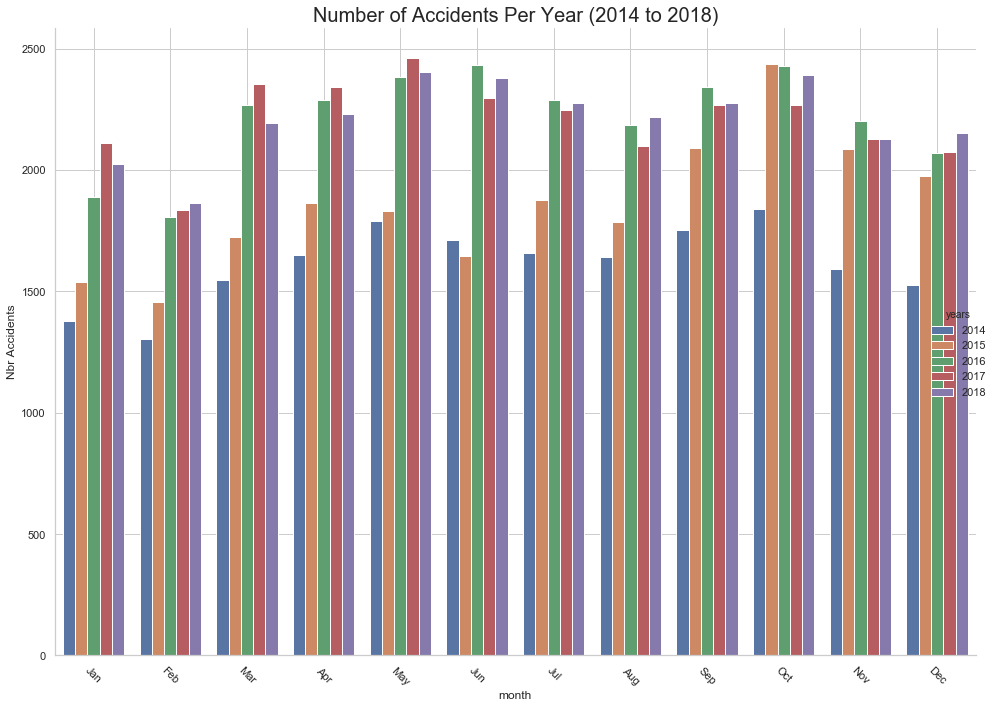

In [14]:
sns.set(style="whitegrid")
#sns.factorplot(x='month', y='Nbr Accidents', hue='years', data=yearlyCount_2, kind='bar',height=10,aspect=1.5)
sns.catplot(x='month', y='Nbr Accidents', hue='years', data=yearlyCount_2, kind='bar',height=10,aspect=1.3)
# Rotate x-labels
plt.xticks(rotation=-45)
plt.title("Number of Accidents Per Year (2014 to 2018)",fontsize=20)
plt.grid(True)
plt.savefig("YearlyOfMonthsBar.png")
plt.tight_layout()
plt.show()


C:\Users\dralk\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


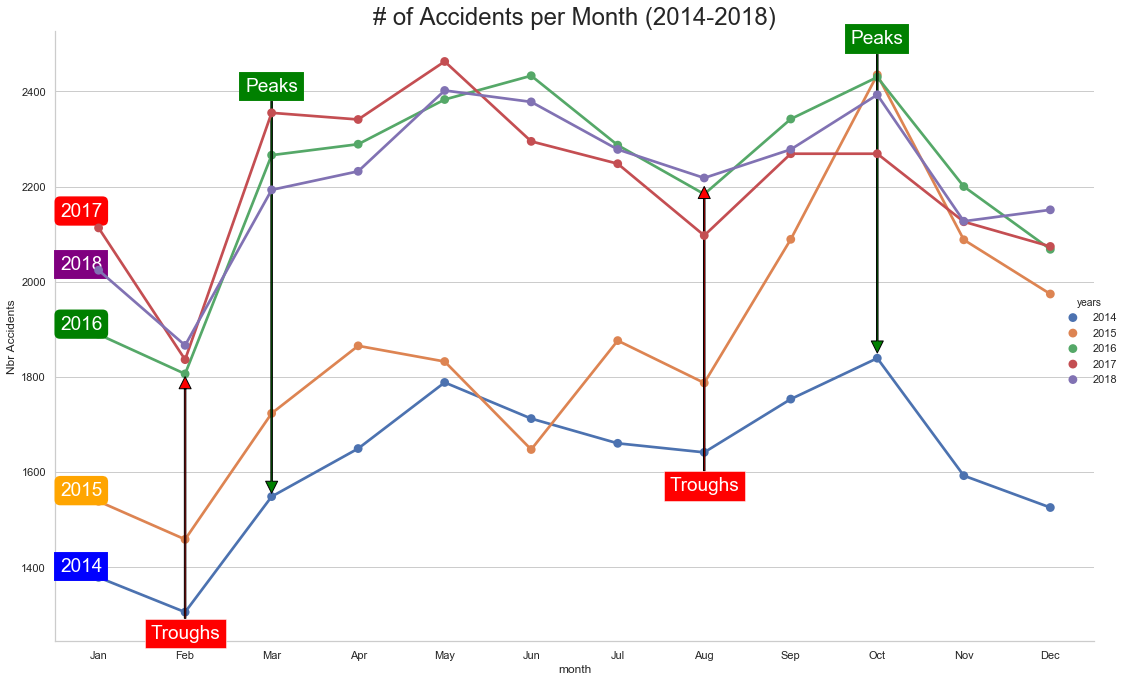

In [15]:
sns.factorplot(x='month', y='Nbr Accidents', hue='years',  data=yearlyCount_2,height=10,aspect=1.5)
sns.set_style("whitegrid") 
sns.set(font_scale=2.0)
plt.title("# of Accidents per Month (2014-2018)",fontsize=24)

plt.annotate('Peaks', xy=(2, 1555), xytext=(2, 2400),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='green',edgecolor="black", shrink=1.05, width=1.5), 
             fontsize=19, color='white', horizontalalignment='center')

plt.annotate('Peaks', xy=(9, 1850), xytext=(9, 2500),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='green',edgecolor="black", shrink=1.05, width=1.5), 
             fontsize=19, color='white', horizontalalignment='center')

plt.annotate('2015', xy=(-.2, 1450), xytext=(-.2, 1550),
             bbox=dict(boxstyle='round', fc='orange', linewidth=0.1),
             fontsize=19, color='white', horizontalalignment='center')
plt.annotate('2017', xy=(-.2, 2138), xytext=(-.2, 2138),
             bbox=dict(boxstyle='round', fc='red', linewidth=0.1),
             fontsize=19, color='white', horizontalalignment='center')

plt.annotate('2018', xy=(-.2, 2025), xytext=(-.2, 2025),
             bbox=dict(boxstyle='square', fc='purple', linewidth=0.1),
             fontsize=19, color='white', horizontalalignment='center')

plt.annotate('2016', xy=(-.2, 1850), xytext=(-.2, 1900),
             bbox=dict(boxstyle='round', fc='green', linewidth=0.1),
             fontsize=19, color='white', horizontalalignment='center')

plt.annotate('2014', xy=(-.2, 1350), xytext=(-.2, 1390),
             bbox=dict(boxstyle='square', fc='blue', linewidth=0.1),
             fontsize=19, color='white', horizontalalignment='center')

plt.annotate('Troughs', xy=(1, 1800), xytext=(1, 1250),
             bbox=dict(boxstyle='square', fc='red', linewidth=0.5),
             arrowprops=dict(facecolor='red', edgecolor="black", shrink=-1.05, width=-1.5), 
            fontsize=19, color='white', horizontalalignment='center')

plt.annotate('Troughs', xy=(7, 2200), xytext=(7, 1560),
             bbox=dict(boxstyle='square',fc='red', linewidth=0.5),
             arrowprops=dict(facecolor='red',edgecolor="black",width=-1.5), 
            fontsize=19, color='white', horizontalalignment='center')

plt.tight_layout()

plt.savefig("YearlyOfMonths.png")
plt.show()

## Number of Accidents per Hours (2016 - 2018)

In [16]:
numberHours = pd.DataFrame()
s2014 = df['2014']
s2015 = df['2015']
s2016 = df['2016']
s2017 = df['2017']
s2018 = df['2018']


numHour16 = s2016.groupby([s2016.index.hour,s2016['CRIMEID']]).agg({'count'})
nbrHourCount16 = (numHour16.iloc[:,0].groupby('datetime').count())
numberHours['2016'] = nbrHourCount16


numHour17 = s2017.groupby([s2017.index.hour,s2017['CRIMEID']]).agg({'count'})
nbrHourCount17 = (numHour17.iloc[:,0].groupby('datetime').count())
numberHours['2017'] = nbrHourCount17

numHour18 = s2018.groupby([s2018.index.hour,s2018['CRIMEID']]).agg({'count'})
nbrHourCount18 = (numHour18.iloc[:,0].groupby('datetime').count())
numberHours['2018'] = nbrHourCount18

#numberHours.reset_index(level=0,inplace=True)
#numberHours_new = numberHours.rename(columns={"datetime":"hour"})

hourlist = ['12AM','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM','12PM','1PM','2PM','3PM','4PM','5PM','6PM','7AM','8AM','9AM','10AM','11AM']
#numberHours_new['hour'] = numberHours_new['hour'].apply(lambda x: calendar.HOUR_OF_DAY[x])
#sales['time_hour'] = sales.timestamp.apply(lambda x: x.hour)
#numberHours_new['hour'] = datetime.strftime('%I').Upper()
#umberHours_new['alphaHour'] = hourlist
numberHours.head()

,2016,2017,2018
datetime,,,
0,1785,1548,1488
1,1775,1597,1469
2,1583,1581,1778
3,987,1311,1581
4,764,1191,1279


In [17]:
numberHours.columns


Index(['2016', '2017', '2018'], dtype='object')

In [18]:
numberHours.reset_index(level=0,inplace=True)
HourCount_new = numberHours.rename(columns={"datetime":"hour"})
#HourCount_new['hour'] = HourCount_new['hour'].apply(lambda x: hourlist[x])
#HourCount_new.set_index('hour', inplace=True)


HourCount_new.head()

,hour,2016,2017,2018
0,0,1785,1548,1488
1,1,1775,1597,1469
2,2,1583,1581,1778
3,3,987,1311,1581
4,4,764,1191,1279


In [19]:
hourlyCount_2 = pd.melt(HourCount_new, id_vars='hour',var_name="year",value_name="Nbr Accidents")
hourlyCount_2.head()

,hour,year,Nbr Accidents
0,0,2016,1785
1,1,2016,1775
2,2,2016,1583
3,3,2016,987
4,4,2016,764


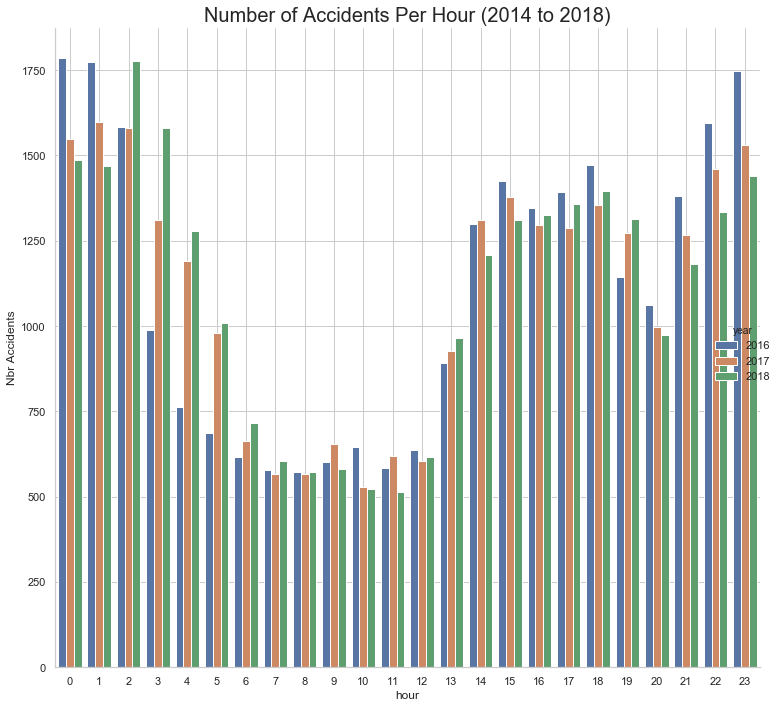

In [20]:
sns.set(style="whitegrid")
#sns.factorplot(x='month', y='Nbr Accidents', hue='years', data=yearlyCount_2, kind='bar',height=10,aspect=1.5)
sns.catplot(x='hour', y='Nbr Accidents', hue='year', data=hourlyCount_2, kind='bar',height=10)
# Rotate x-labels
#plt.xticks(rotation=-45)
plt.title("Number of Accidents Per Hour (2014 to 2018)",fontsize=20)
plt.grid(True)
plt.savefig("YearlyOfHoursBars.png")
plt.tight_layout()
plt.show()

C:\Users\dralk\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


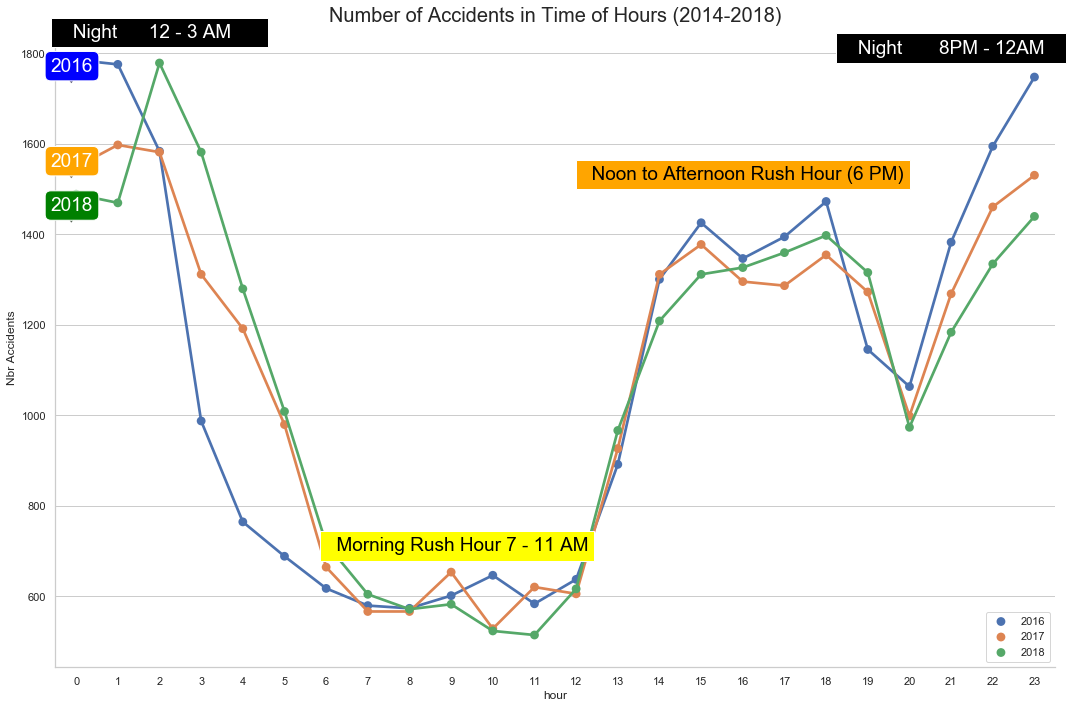

In [21]:

sns.factorplot(x='hour', y='Nbr Accidents', legend=False, hue='year', data=hourlyCount_2,height=10,aspect=1.5)

#hourlist = ['12AM','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM','12AM','1PM','2PM','3PM','4PM','5PM','6PM','7PM','8PM','9PM','10PM','11PM']

plt.title("Number of Accidents in Time of Hours (2014-2018)",fontsize=20)
plt.annotate('  Morning Rush Hour 7 - 11 AM', xy=(6, 700), xytext=(6, 700),
             bbox=dict(boxstyle='square',fc='yellow'),
 #            arrowprops=dict(facecolor='red',edgecolor="black",width=-1.5), 
             fontsize=19, color='black', horizontalalignment='left')


plt.annotate('   Night       8PM - 12AM   ', xy=(21, 1800), xytext=(21, 1800),
             bbox=dict(boxstyle='square',fc='black'),
 #            arrowprops=dict(facecolor='red',edgecolor="black",width=-1.5), 
             fontsize=19, color='white', horizontalalignment='center')

plt.annotate('  Noon to Afternoon Rush Hour (6 PM)', xy=(16, 1520), xytext=(16, 1520),
             bbox=dict(boxstyle='square',fc='orange'),
 #            arrowprops=dict(facecolor='red',edgecolor="black",width=-1.5), 
             fontsize=19, color='black', horizontalalignment='center')
          
plt.annotate('   Night      12 - 3 AM      ', xy=(1, 1835), xytext=(2, 1835),
             bbox=dict(boxstyle='square',fc='black'),
 #            arrowprops=dict(facecolor='red',edgecolor="black",width=-1.5), 
             fontsize=19, color='white', horizontalalignment='center')

plt.annotate('2018', xy=(.05, 1452), xytext=(-0.1, 1452),
             bbox=dict(boxstyle='round',fc='green'),
             arrowprops=dict(facecolor='green',edgecolor="black",alpha=.5,width=-1.5), 
             fontsize=19, color='white', horizontalalignment='center')
plt.annotate('2017', xy=(.05, 1550), xytext=(-0.1, 1550),
             bbox=dict(boxstyle='round',fc='orange'),
             arrowprops=dict(facecolor='orange',edgecolor="black",alpha=.5,width=-1.5), 
             fontsize=19, color='white', horizontalalignment='center')
plt.annotate('2016', xy=(.05, 1760), xytext=(-0.1, 1760),
             bbox=dict(boxstyle='round',fc='blue'),
             arrowprops=dict(facecolor='blue',edgecolor="black",alpha=.5,width=-1.5), 
             fontsize=19, color='white', horizontalalignment='center')
plt.legend(loc="lower right")
plt.savefig("YearlyOfHours.png",left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.tight_layout()
plt.show()
# map_img = mpimg.imread('sunrise2.jpg') 
# plt.imshow(map_img, zorder=1, aspect='auto')

# Number of Accidents in days of the week (2016 - 2018)

# Number of Accidents in the Day of the week

In [22]:
numberDays = pd.DataFrame()


daylist = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

numDay16 = s2016.groupby([s2016.index.weekday_name,s2016['CRIMEID']]).agg({'count'})
nbrDayCount16 = (numDay16.iloc[:,0].groupby('datetime').count().reindex(daylist))
numberDays['2016'] = nbrDayCount16

numDay17 = s2017.groupby([s2017.index.weekday_name,s2017['CRIMEID']]).agg({'count'})
nbrDayCount17 = (numDay17.iloc[:,0].groupby('datetime').count().reindex(daylist))
numberDays['2017'] = nbrDayCount17

numDay18 = s2018.groupby([s2018.index.weekday_name,s2018['CRIMEID']]).agg({'count'})
nbrDayCount18 = (numDay18.iloc[:,0].groupby('datetime').count().reindex(daylist))
numberDays['2018'] = nbrDayCount18



In [23]:
numberDays.reset_index(level=0,inplace=True,)
numberDays_new = numberDays.rename(columns={"datetime":"day"})

numberDays_new

,day,2016,2017,2018
0,Sunday,3176,3351,3247
1,Monday,3251,3304,3427
2,Tuesday,3828,3680,3843
3,Wednesday,3876,4076,3941
4,Thursday,4293,4085,3988
5,Friday,4225,4034,4095
6,Saturday,3928,3956,3999


In [24]:
dayCount_2 = pd.melt(numberDays_new, id_vars='day',var_name="years",value_name="Nbr Accidents")
dayCount_2.head()

,day,years,Nbr Accidents
0,Sunday,2016,3176
1,Monday,2016,3251
2,Tuesday,2016,3828
3,Wednesday,2016,3876
4,Thursday,2016,4293


C:\Users\dralk\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


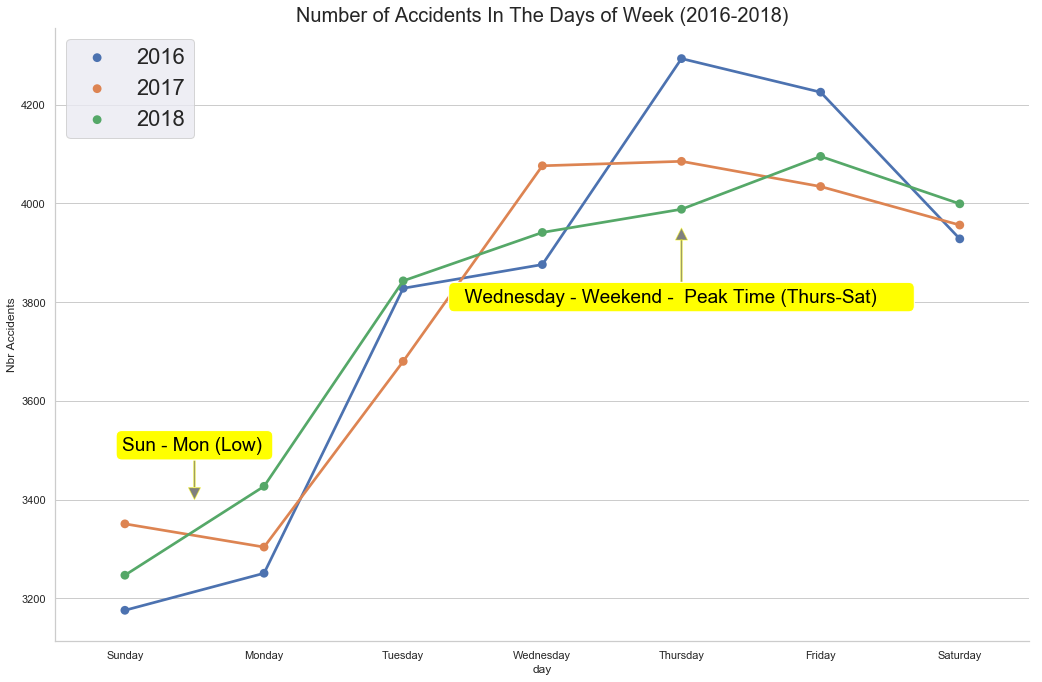

In [25]:
sns.factorplot(x='day', y='Nbr Accidents', hue='years', legend=False, data=dayCount_2,height=10,aspect=1.5)
sns.set(font_scale=2)
plt.title("Number of Accidents In The Days of Week (2016-2018)",fontsize=20)
plt.annotate('  Wednesday - Weekend -  Peak Time (Thurs-Sat)      ', xy=(4, 3950), xytext=(4, 3800),
             bbox=dict(boxstyle='round',fc='yellow'),
             arrowprops=dict(facecolor='black',edgecolor="yellow",alpha=.5,width=-1.5), 
             fontsize=19, color='black', horizontalalignment='center')

plt.annotate('Sun - Mon (Low) ', xy=(0.5, 3400), xytext=(0.5, 3500),
             bbox=dict(boxstyle='round',fc='yellow'),
             arrowprops=dict(facecolor='black',edgecolor="yellow",alpha=.5,width=-1.5), 
             fontsize=19, color='black', horizontalalignment='center')
plt.legend(loc="upper left")
plt.savefig("YearlyOfDays.png")
plt.tight_layout()

plt.show()